In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,ADJUSTMENT,TYPE_ACCOMMODATION,ECON_ACTIVITY_NACE_2007,COUNTRY_RES_GUESTS,LOCALITY_TYPE,URBANIZ_DEGREE,...,NOTE_ECON_ACTIVITY_NACE_2007,NOTE_COUNTRY_RES_GUESTS,NOTE_LOCALITY_TYPE,NOTE_URBANIZ_DEGREE,NOTE_COASTAL_AREA,NOTE_SIZE_BY_NUMBER_ROOMS,NOTE_TIME_PERIOD,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:122_54_DF_DCSC_TUR_6(1.0),A,IT,AR,N,ALL,551_553,IT,ALL,ALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='TIME_PERIOD'>

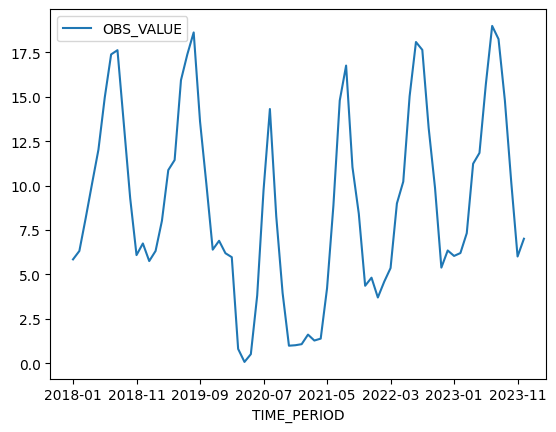

In [3]:
arrivals_per_month = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) > 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_month[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
months = arrivals.index.to_series().apply(lambda x: x.split('-')[1]).unique()
years = arrivals.index.to_series().apply(lambda x: x.split('-')[0]).unique()
arrivals.plot()

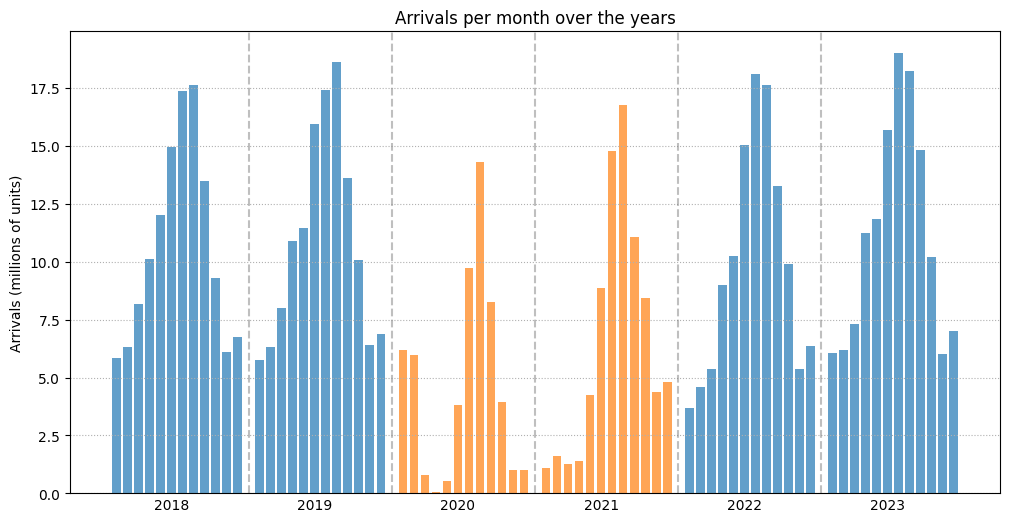

In [4]:
plt.figure(figsize=(12, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  color = 'C1' if year in ['2020', '2021'] else 'C0'
  if year != min(years):
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--', alpha=0.5)
  plt.bar(year_data.index, year_data['OBS_VALUE'], color=color, alpha=0.7)

plt.xticks([])
plt.ylabel("Arrivals (millions of units)")
plt.title("Arrivals per month over the years")
plt.grid(True, axis='y', linestyle=':')
plt.show()

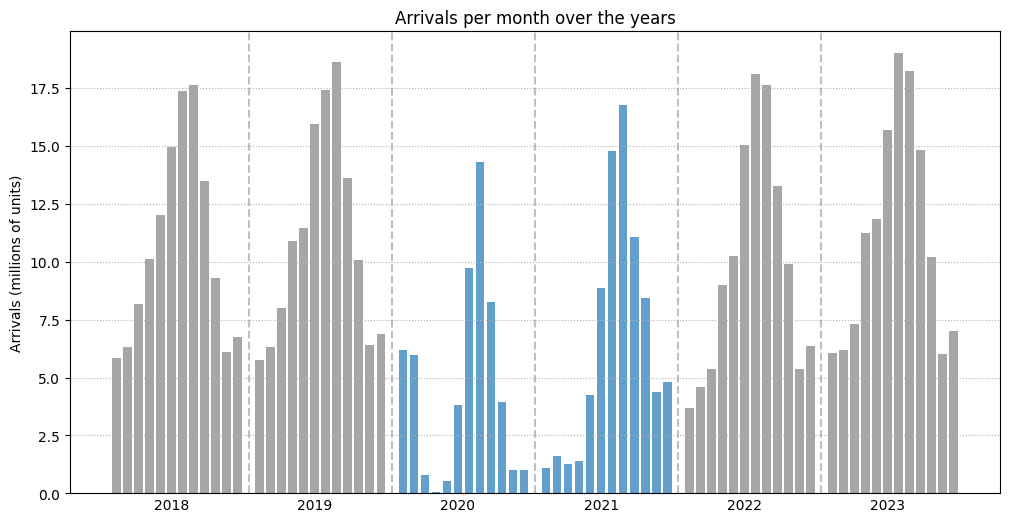

In [5]:
plt.figure(figsize=(12, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  color = 'C0' if year in ['2020', '2021'] else 'gray'
  if year != min(years):
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--', alpha=0.5)
  plt.bar(year_data.index, year_data['OBS_VALUE'], color=color, alpha=0.7)

plt.xticks([])
plt.ylabel("Arrivals (millions of units)")
plt.title("Arrivals per month over the years")
plt.grid(True, axis='y', linestyle=':')
plt.show()

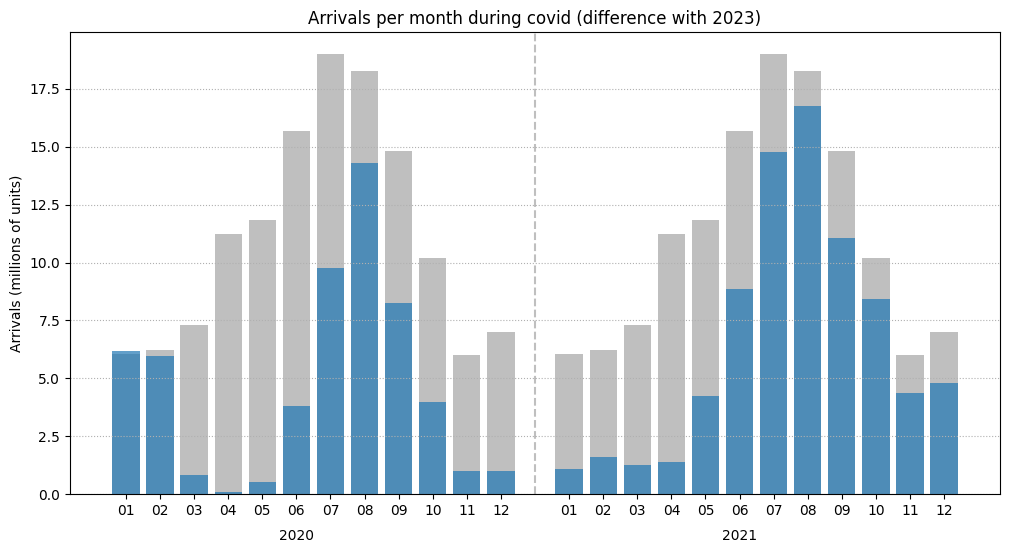

In [18]:
plt.figure(figsize=(12, 6))

for year in ['2020', '2021']:
  plt.text(f'{year}-06', -1.5, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  ref_data = arrivals.loc[arrivals.index.str.startswith('2023')]
  if year != '2020':
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--', alpha=0.5)
  plt.bar(year_data.index, ref_data['OBS_VALUE'], color='gray', label='2023', alpha=0.5)
  plt.bar(year_data.index, year_data['OBS_VALUE'], color='C0', label=year, alpha=0.7)

xticks = plt.xticks()
xticks_ticks = [tick for tick in xticks[0] if '2021-0' != xticks[1][tick].get_text()]
xtick_labels = [label.get_text() for label in xticks[1] if label.get_text() != '2021-0']
new_labels = [label.split('-')[1] for label in xtick_labels]
plt.xticks(xticks_ticks, new_labels)

plt.ylabel("Arrivals (millions of units)")
plt.title("Arrivals per month during covid (difference with 2023)")
plt.grid(True, axis='y', linestyle=':')
plt.show()